<a href="https://colab.research.google.com/github/asmirti-creations/Face-Mask-Detection/blob/main/Face_Mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#configuring the path of Kaggle.json file
!mkdir -p ~/.Kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [50]:
#API to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [53]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data  with_mask_resized  without_mask_resized


In [54]:
import os

In [55]:
filenames_with_mask = os.listdir('/content/data/with_mask')
print(filenames_with_mask)


['with_mask_459.jpg', 'with_mask_929.jpg', 'with_mask_767.jpg', 'with_mask_3123.jpg', 'with_mask_231.jpg', 'with_mask_864.jpg', 'with_mask_3250.jpg', 'with_mask_2760.jpg', 'with_mask_597.jpg', 'with_mask_3316.jpg', 'with_mask_2492.jpg', 'with_mask_1839.jpg', 'with_mask_431.jpg', 'with_mask_2287.jpg', 'with_mask_738.jpg', 'with_mask_2341.jpg', 'with_mask_3530.jpg', 'with_mask_2493.jpg', 'with_mask_1611.jpg', 'with_mask_140.jpg', 'with_mask_1331.jpg', 'with_mask_141.jpg', 'with_mask_3572.jpg', 'with_mask_2991.jpg', 'with_mask_562.jpg', 'with_mask_137.jpg', 'with_mask_693.jpg', 'with_mask_2701.jpg', 'with_mask_2811.jpg', 'with_mask_1485.jpg', 'with_mask_2809.jpg', 'with_mask_1639.jpg', 'with_mask_3340.jpg', 'with_mask_2786.jpg', 'with_mask_2324.jpg', 'with_mask_1360.jpg', 'with_mask_924.jpg', 'with_mask_50.jpg', 'with_mask_1962.jpg', 'with_mask_2919.jpg', 'with_mask_1997.jpg', 'with_mask_330.jpg', 'with_mask_1459.jpg', 'with_mask_2748.jpg', 'with_mask_3220.jpg', 'with_mask_1922.jpg', 'wit

In [56]:
num_with_mask = len(filenames_with_mask)
print("Number of images with mask : ", num_with_mask)

Number of images with mask :  3725


In [57]:
filenames_without_mask = os.listdir('/content/data/without_mask')
print(filenames_without_mask)


['without_mask_315.jpg', 'without_mask_100.jpg', 'without_mask_2135.jpg', 'without_mask_3195.jpg', 'without_mask_1664.jpg', 'without_mask_1369.jpg', 'without_mask_2978.jpg', 'without_mask_611.jpg', 'without_mask_2019.jpg', 'without_mask_3535.jpg', 'without_mask_1771.jpg', 'without_mask_429.jpg', 'without_mask_734.jpg', 'without_mask_2885.jpg', 'without_mask_3167.jpg', 'without_mask_674.jpg', 'without_mask_3764.jpg', 'without_mask_220.jpg', 'without_mask_3571.jpg', 'without_mask_2838.jpg', 'without_mask_2330.jpg', 'without_mask_2855.jpg', 'without_mask_2573.jpg', 'without_mask_167.jpg', 'without_mask_778.jpg', 'without_mask_2543.jpg', 'without_mask_3754.jpg', 'without_mask_3447.jpg', 'without_mask_706.jpg', 'without_mask_290.jpg', 'without_mask_2124.jpg', 'without_mask_3794.jpg', 'without_mask_3652.jpg', 'without_mask_146.jpg', 'without_mask_3433.jpg', 'without_mask_2754.jpg', 'without_mask_939.jpg', 'without_mask_43.jpg', 'without_mask_83.jpg', 'without_mask_1161.jpg', 'without_mask_23

In [58]:
num_without_mask = len(filenames_without_mask)
print("Number of images without mask : ", num_without_mask)

Number of images without mask :  3828


Importing the Dependencies

In [59]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Creating Labels for two classes of images

In [60]:
with_mask_labels = [1]*3725
print(with_mask_labels)
len(with_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

3725

In [61]:
without_mask_labels = [0]*3828
print(without_mask_labels)
len(without_mask_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

3828

In [62]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


Understanding the image dataset

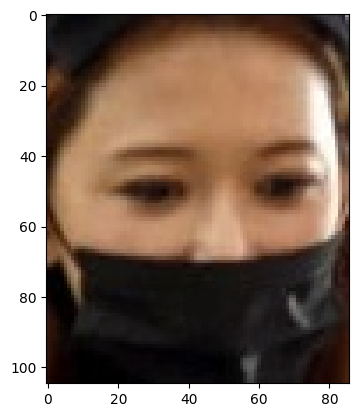

In [63]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_100.jpg')
plt.imshow(img)

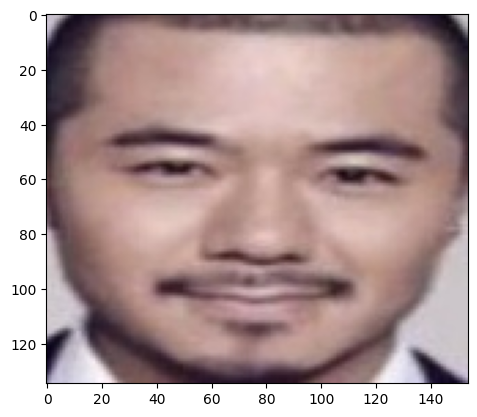

In [64]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
plt.imshow(img)

Resizing all images and saving these images in different folders

In [66]:
#creating directories for resized images
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

FileExistsError: [Errno 17] File exists: 'with_mask_resized'

In [67]:
#resize with_mask images
with_mask_folder = '/content/data/with_mask/'
with_mask_resized_folder = '/content/with_mask_resized/'

for filename in os.listdir(with_mask_folder):
  img_path = with_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')

  newImgPath = with_mask_resized_folder+filename
  img.save(newImgPath)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
#resize without_mask images
without_mask_folder = '/content/data/without_mask/'
without_mask_resized_folder = '/content/without_mask_resized/'

for filename in os.listdir(without_mask_folder):
  img_path = without_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')

  newImgPath = without_mask_resized_folder+filename
  img.save(newImgPath)

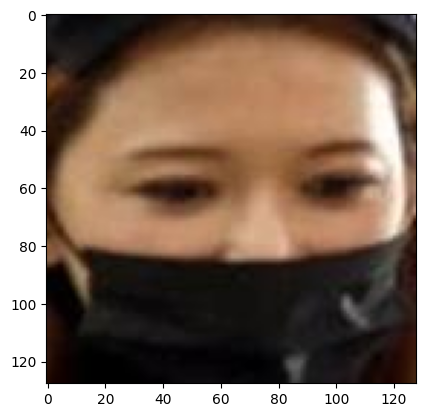

In [18]:
#displaying the resized with mask image
img = mpimg.imread('/content/with_mask_resized/with_mask_100.jpg')
plt.imshow(img)

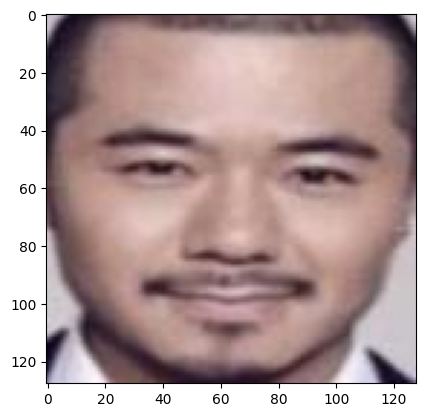

In [19]:
#displaying the resized without mask image
img = mpimg.imread('/content/without_mask_resized/without_mask_10.jpg')
plt.imshow(img)

**Converting images to numpy array**

In [68]:
import cv2
import glob

In [69]:
#reading with_mask images
imdir = '/content/with_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.'+e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])

In [70]:
#reading without_mask images
imdir = '/content/without_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.'+e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [71]:
print(with_mask_images)

[[[[ 22  33  31]
   [ 29  40  38]
   [ 39  47  47]
   ...
   [ 31  30  39]
   [ 28  27  36]
   [ 27  26  35]]

  [[ 23  34  32]
   [ 29  40  38]
   [ 38  46  46]
   ...
   [ 33  32  41]
   [ 29  28  37]
   [ 28  27  36]]

  [[ 27  35  35]
   [ 31  39  39]
   [ 38  43  44]
   ...
   [ 36  35  44]
   [ 32  31  40]
   [ 30  29  38]]

  ...

  [[ 53  54  58]
   [ 51  52  56]
   [ 46  47  51]
   ...
   [ 15  18  22]
   [ 12  15  20]
   [ 10  14  19]]

  [[ 51  52  56]
   [ 49  50  54]
   [ 45  46  50]
   ...
   [ 15  18  23]
   [ 12  15  23]
   [ 10  16  23]]

  [[ 49  50  54]
   [ 48  49  53]
   [ 46  47  51]
   ...
   [ 15  19  24]
   [ 13  16  24]
   [ 11  17  24]]]


 [[[181 231 255]
   [154 201 232]
   [130 175 209]
   ...
   [175 168 171]
   [ 93  84  94]
   [ 66  56  68]]

  [[166 216 246]
   [146 193 224]
   [127 172 206]
   ...
   [179 172 175]
   [ 98  89  99]
   [ 77  67  79]]

  [[166 216 246]
   [151 198 229]
   [133 178 212]
   ...
   [171 165 170]
   [ 91  83  94]
   [ 77  68

In [24]:
print(without_mask_images)

[[[[ 79  60  53]
   [121 102  95]
   [143 124 117]
   ...
   [134 119 147]
   [133 118 146]
   [131 116 143]]

  [[ 97  78  71]
   [135 116 109]
   [150 131 124]
   ...
   [134 119 147]
   [132 117 145]
   [129 114 141]]

  [[113  93  88]
   [146 126 121]
   [156 134 129]
   ...
   [134 120 148]
   [130 116 144]
   [125 112 138]]

  ...

  [[114  67  36]
   [110  63  32]
   [105  59  28]
   ...
   [ 98  47  31]
   [101  49  33]
   [101  49  32]]

  [[112  64  36]
   [108  60  32]
   [102  56  25]
   ...
   [ 98  49  35]
   [101  49  36]
   [101  50  34]]

  [[110  62  34]
   [106  58  30]
   [100  54  23]
   ...
   [ 97  50  36]
   [102  50  37]
   [102  50  37]]]


 [[[204 203 213]
   [157 156 166]
   [ 99  98 108]
   ...
   [ 12  14  24]
   [ 11  13  23]
   [ 11  13  23]]

  [[198 197 207]
   [150 149 159]
   [ 92  91 101]
   ...
   [ 13  15  25]
   [ 13  15  25]
   [ 12  14  24]]

  [[177 176 186]
   [128 127 137]
   [ 75  74  84]
   ...
   [ 16  18  28]
   [ 15  17  27]
   [ 14  16

In [72]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [73]:
combined_images = np.concatenate((with_mask_images, without_mask_images))

In [29]:
print(combined_images.shape)

(7553, 128, 128, 3)


In [30]:
print(combined_images)

[[[[ 22  33  31]
   [ 29  40  38]
   [ 39  47  47]
   ...
   [ 31  30  39]
   [ 28  27  36]
   [ 27  26  35]]

  [[ 23  34  32]
   [ 29  40  38]
   [ 38  46  46]
   ...
   [ 33  32  41]
   [ 29  28  37]
   [ 28  27  36]]

  [[ 27  35  35]
   [ 31  39  39]
   [ 38  43  44]
   ...
   [ 36  35  44]
   [ 32  31  40]
   [ 30  29  38]]

  ...

  [[ 53  54  58]
   [ 51  52  56]
   [ 46  47  51]
   ...
   [ 15  18  22]
   [ 12  15  20]
   [ 10  14  19]]

  [[ 51  52  56]
   [ 49  50  54]
   [ 45  46  50]
   ...
   [ 15  18  23]
   [ 12  15  23]
   [ 10  16  23]]

  [[ 49  50  54]
   [ 48  49  53]
   [ 46  47  51]
   ...
   [ 15  19  24]
   [ 13  16  24]
   [ 11  17  24]]]


 [[[181 231 255]
   [154 201 232]
   [130 175 209]
   ...
   [175 168 171]
   [ 93  84  94]
   [ 66  56  68]]

  [[166 216 246]
   [146 193 224]
   [127 172 206]
   ...
   [179 172 175]
   [ 98  89  99]
   [ 77  67  79]]

  [[166 216 246]
   [151 198 229]
   [133 178 212]
   ...
   [171 165 170]
   [ 91  83  94]
   [ 77  68

In [75]:
#data & labels
X = combined_images
Y = np.asarray(labels)

Train Test Split

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [76]:
print(X.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


6042 --> training images
1511 --> testing images

In [38]:
print(X_train[0])

[[[239 226 228]
  [231 218 220]
  [217 204 206]
  ...
  [ 53  72  77]
  [ 54  73  78]
  [ 55  74  79]]

 [[240 227 229]
  [224 211 213]
  [196 183 185]
  ...
  [ 48  67  72]
  [ 50  69  74]
  [ 51  70  75]]

 [[233 220 222]
  [221 208 210]
  [196 183 185]
  ...
  [ 41  60  65]
  [ 43  62  67]
  [ 44  63  68]]

 ...

 [[235 201 178]
  [155 121  98]
  [111  75  57]
  ...
  [203 190 192]
  [234 220 221]
  [236 223 221]]

 [[215 179 155]
  [162 128 105]
  [154 118 100]
  ...
  [227 214 216]
  [245 232 230]
  [243 228 225]]

 [[198 162 138]
  [167 130 108]
  [170 135 115]
  ...
  [235 223 223]
  [240 225 223]
  [232 217 214]]]


In [41]:
#standardizing the data

X_train_std = X_train/255
Y_test_std = X_test/255

In [43]:
print(X_train_std[0])

[[[0.9372549  0.88627451 0.89411765]
  [0.90588235 0.85490196 0.8627451 ]
  [0.85098039 0.8        0.80784314]
  ...
  [0.20784314 0.28235294 0.30196078]
  [0.21176471 0.28627451 0.30588235]
  [0.21568627 0.29019608 0.30980392]]

 [[0.94117647 0.89019608 0.89803922]
  [0.87843137 0.82745098 0.83529412]
  [0.76862745 0.71764706 0.7254902 ]
  ...
  [0.18823529 0.2627451  0.28235294]
  [0.19607843 0.27058824 0.29019608]
  [0.2        0.2745098  0.29411765]]

 [[0.91372549 0.8627451  0.87058824]
  [0.86666667 0.81568627 0.82352941]
  [0.76862745 0.71764706 0.7254902 ]
  ...
  [0.16078431 0.23529412 0.25490196]
  [0.16862745 0.24313725 0.2627451 ]
  [0.17254902 0.24705882 0.26666667]]

 ...

 [[0.92156863 0.78823529 0.69803922]
  [0.60784314 0.4745098  0.38431373]
  [0.43529412 0.29411765 0.22352941]
  ...
  [0.79607843 0.74509804 0.75294118]
  [0.91764706 0.8627451  0.86666667]
  [0.9254902  0.8745098  0.86666667]]

 [[0.84313725 0.70196078 0.60784314]
  [0.63529412 0.50196078 0.41176471]


**Building the neural network**

In [48]:
import tensorflow as tf
import keras

In [78]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [79]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
model.fit(X_train_std, Y_train, epochs=10)

Epoch 1/10
189/189 [==============================] - 13s 57ms/step - loss: 1.1389 - accuracy: 0.6986
Epoch 2/10
189/189 [==============================] - 11s 60ms/step - loss: 0.4154 - accuracy: 0.8390
Epoch 3/10
189/189 [==============================] - 10s 50ms/step - loss: 0.3961 - accuracy: 0.8419
Epoch 4/10
189/189 [==============================] - 11s 59ms/step - loss: 0.3701 - accuracy: 0.8500
Epoch 5/10
189/189 [==============================] - 12s 62ms/step - loss: 0.3164 - accuracy: 0.8719
Epoch 6/10
189/189 [==============================] - 10s 51ms/step - loss: 0.2874 - accuracy: 0.8866
Epoch 7/10
189/189 [==============================] - 11s 60ms/step - loss: 0.3750 - accuracy: 0.8451
Epoch 8/10
189/189 [==============================] - 11s 60ms/step - loss: 0.3194 - accuracy: 0.8736
Epoch 9/10
189/189 [==============================] - 10s 51ms/step - loss: 0.2939 - accuracy: 0.8788
Epoch 10/10
189/189 [==============================] - 11s 60ms/step - loss: 0.269

In [81]:
score, acc = model.evaluate(X_test_std, Y_test)
print('Test data loss:', score)
print('Test data accuracy:', acc)

48/48 [==============================] - 1s 12ms/step - loss: 0.2870 - accuracy: 0.8809
Test data loss: 0.28701403737068176
Test data accuracy: 0.8808736205101013


Build a Predictive System

In [82]:
from google.colab.patches import cv2_imshow

Path of the image to be predicted: /content/img2.jpeg


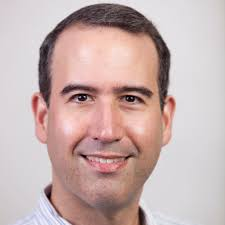

1/1 [==============================] - 0s 33ms/step
The person is not wearing mask


In [84]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_resize = input_image_resize/255
image_reshape= np.reshape(input_image_resize, [1,128,128,3])
input_prediction = model.predict(image_reshape)
input_pred_label = np.argmax(input_prediction)
if input_pred_label == 1:
  print('The person is wearing mask')
else:
  print('The person is not wearing mask')